In [94]:
import yfinance as yf
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

In [95]:
# ดึงข้อมูลหุ้น AOT
stock_symbol = "GULF.BK"  # สำหรับตลาดหลักทรัพย์ไทย (SET)
df = yf.download(stock_symbol, start="2023-01-01", end="2023-12-31")
df.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GULF.BK,GULF.BK,GULF.BK,GULF.BK,GULF.BK
Date,,,,,
2023-01-03,52.368126,53.082237,52.368126,52.606163,9400300
2023-01-04,52.606163,53.082237,52.130089,52.368126,11692300
2023-01-05,52.844200,53.320274,52.606163,52.844200,13887600
2023-01-06,52.844200,53.082237,52.606163,52.844200,11046600
2023-01-09,52.844200,53.082237,52.130089,53.082237,23063500


In [96]:
excel_filename = "AOT_Stock_2023.xlsx"
df.to_excel(excel_filename)

In [97]:
df1=pd.read_excel("/content/AOT_Stock_2023.xlsx")
df1.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,GULF.BK,GULF.BK,GULF.BK,GULF.BK,GULF.BK
1,Date,NaN,NaN,NaN,NaN,NaN
2,2023-01-03 00:00:00,52.368126,53.082237,52.368126,52.606163,9400300
3,2023-01-04 00:00:00,52.606163,53.082237,52.130089,52.368126,11692300
4,2023-01-05 00:00:00,52.8442,53.320274,52.606163,52.8442,13887600


In [98]:
df1 = df1.drop(df1.index[[0, 1]])
df1.head()

,Price,Close,High,Low,Open,Volume
2,2023-01-03 00:00:00,52.368126,53.082237,52.368126,52.606163,9400300
3,2023-01-04 00:00:00,52.606163,53.082237,52.130089,52.368126,11692300
4,2023-01-05 00:00:00,52.8442,53.320274,52.606163,52.8442,13887600
5,2023-01-06 00:00:00,52.8442,53.082237,52.606163,52.8442,11046600
6,2023-01-09 00:00:00,52.8442,53.082237,52.130089,53.082237,23063500


In [99]:
# เช็คข้อมูลที่หายไป
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Price   Ticker 
Close   GULF.BK    0
High    GULF.BK    0
Low     GULF.BK    0
Open    GULF.BK    0
Volume  GULF.BK    0
dtype: int64


In [100]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 2 to 244
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   243 non-null    object
 1   Close   243 non-null    object
 2   High    243 non-null    object
 3   Low     243 non-null    object
 4   Open    243 non-null    object
 5   Volume  243 non-null    object
dtypes: object(6)
memory usage: 11.5+ KB


In [101]:
df1.describe()

<ipython-input-101-784441b173b6>:1: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  df1.describe()


,Price,Close,High,Low,Open,Volume
count,243,243.000000,243.000000,243.000000,243.000000,243
unique,243,56.000000,157.000000,158.000000,175.000000,242
top,2023-01-03 00:00:00,51.415977,51.892051,51.177941,51.654014,11502100
freq,1,13.000000,8.000000,7.000000,6.000000,2


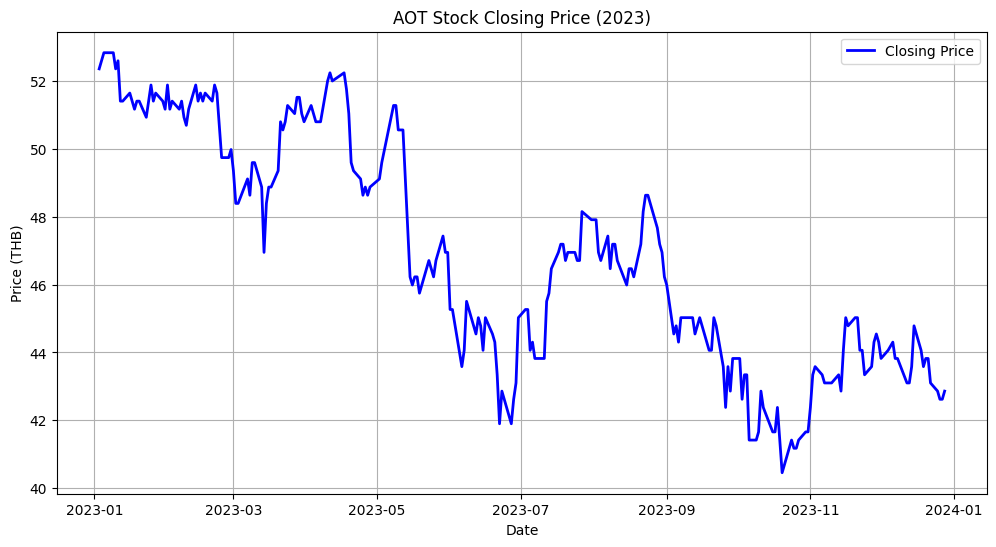

In [102]:
# สร้างกราฟราคาปิดของหุ้น AOT
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Closing Price", linewidth=2, color='blue')

plt.title("AOT Stock Closing Price (2023)")
plt.xlabel("Date")
plt.ylabel("Price (THB)")
plt.legend()
plt.grid()

# แสดงกราฟ
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

df1=df1
# ใช้เฉพาะราคาปิด
data = df[["Close"]].values

# สเกลข้อมูลให้อยู่ในช่วง 0-1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# ฟังก์ชันสร้างชุดข้อมูลแบบ Time Series
def create_dataset(dataset, time_step=60):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# ตั้งค่าช่วงเวลา 60 วันย้อนหลังเพื่อพยากรณ์วันถัดไป
time_step = 60
X, Y = create_dataset(scaled_data, time_step)

# แบ่ง Train-Test (80-20)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# แปลงให้เป็นรูปแบบที่เหมาะสมกับ LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# สร้างโมเดล LSTM
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

# คอมไพล์โมเดล
model.compile(optimizer="adam", loss="mean_squared_error")

# เทรนโมเดล
model.fit(X_train, Y_train, batch_size=16, epochs=50)

# ทำการพยากรณ์
predictions = model.predict(X_test)

# แปลงค่ากลับเป็นราคาหุ้นจริง
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
Y_test_actual = scaler.inverse_transform(Y_test.reshape(-1, 1))

# วัดผลลัพธ์ด้วย RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y_test_actual, predictions))
print(f"📊 RMSE: {rmse}")

# วาดกราฟเปรียบเทียบผลลัพธ์
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(Y_test_actual):], Y_test_actual, label="Actual Price", color="blue")
plt.plot(df.index[-len(predictions):], predictions, label="Predicted Price", color="red")
plt.title("AOT Stock Price Prediction with LSTM")
plt.xlabel("Date")
plt.ylabel("Price (THB)")
plt.legend()
plt.show()


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 0.1136
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0234
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0185
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0148
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0142
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0124
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0132
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0133
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0129
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0107
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0170
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0140
Epoch 13/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0111
Epoch 14/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0100
Epoch 15/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0125
Epoch 16/50
10/

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


data = df[["Close"]].values

# สเกลข้อมูลให้อยู่ในช่วง 0-1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# ฟังก์ชันสร้างชุดข้อมูลแบบ Time Series
def create_dataset(dataset, time_step=60):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

# ตั้งค่าช่วงเวลา 60 วันย้อนหลังเพื่อพยากรณ์วันถัดไป
time_step = 60
X, Y = create_dataset(scaled_data, time_step)

# แบ่ง Train-Test (80-20)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# แปลงให้เป็นรูปแบบที่เหมาะสมกับ LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# สร้างโมเดล LSTM
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

# คอมไพล์โมเดล
model.compile(optimizer="adam", loss="mean_squared_error")

# เทรนโมเดล
model.fit(X_train, Y_train, batch_size=16, epochs=50, verbose=1)

# ทำการพยากรณ์ปี 2024
future_days = 365  # จำนวนวันที่ต้องการทำนาย
future_predictions = []

# ใช้ข้อมูล 60 วันสุดท้ายเป็นจุดเริ่มต้น
last_60_days = scaled_data[-time_step:].reshape(1, time_step, 1)

for _ in range(future_days):
    pred = model.predict(last_60_days, verbose=0)
    pred = pred.reshape(1, 1, 1)  # แปลงให้มีขนาด 3 มิติ
    future_predictions.append(pred[0, 0])
    last_60_days = np.append(last_60_days[:, 1:, :], pred, axis=1)

# แปลงค่ากลับเป็นราคาหุ้นจริง
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# แปลง last_date ให้เป็น datetime
last_date = pd.to_datetime(df.index[-1])

# สร้างช่วงวันที่สำหรับปี 2024
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days, freq='D')


In [ ]:
# ตรวจสอบและแปลง df.index และ future_dates เป็น datetime
df.index = pd.to_datetime(df.index, errors="coerce")
future_dates = pd.to_datetime(future_dates, errors="coerce")

# วาดกราฟทำนายราคาหุ้นปี 2024
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Close"], label="Actual Price", color="blue")
plt.plot(future_dates, future_predictions, label="Predicted Price (2024)", color="red", linestyle="dashed")
plt.title("AOT Stock Price Prediction for 2024")
plt.xlabel("Date")
plt.ylabel("Price (THB)")
plt.legend()
plt.grid()
plt.show()
